In [1]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np

In [2]:
#each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds=xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [3]:
ds

<xarray.Dataset>
Dimensions:       (station: 30, time: 166559, level: 137, halflevel: 138)
Coordinates:
  * halflevel     (halflevel) int32 1 2 3 4 5 6 7 ... 133 134 135 136 137 138
  * level         (level) int32 1 2 3 4 5 6 7 8 ... 131 132 133 134 135 136 137
  * station       (station) int64 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30
    station_name  (station) <U26 dask.array<chunksize=(30,), meta=np.ndarray>
  * time          (time) datetime64[ns] 2020-01-20T00:06:00 ... 2021-01-01
Data variables: (12/51)
    10u           (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    10v           (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    2q            (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    2t            (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    al            (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    blh           (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    ...            ...
    v             (station, level, time) float64 dask.array<chunksize=(1, 35, 30000), meta=np.ndarray>
    vfvdf         (station, halflevel, time) float64 dask.array<chunksize=(1, 35, 30000), meta=np.ndarray>
    w             (station, level, time) float64 dask.array<chunksize=(1, 35, 30000), meta=np.ndarray>
    z             (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    zo            (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
    zoh           (station, time) float64 dask.array<chunksize=(1, 166559), meta=np.ndarray>
Attributes:
    exp:      hqys

In [5]:
#Here all the 30 station names and locations:
list(zip(ds.station_name.values,ds.station.values,ds.lat.values,ds.lon.values))


[('BARBADOS CLOUD OBSERVATORY', 1, 13.2, -59.410000000000025),
 ('EUREC4A_1', 2, 13.62, -56.75999999999999),
 ('EUREC4A_2', 3, 14.11, -57.129999999999995),
 ('EUREC4A_3', 4, 14.32, -57.70999999999998),
 ('EUREC4A_4', 5, 14.11, -58.339999999999975),
 ('EUREC4A_5', 6, 13.62, -58.660000000000025),
 ('EUREC4A_6', 7, 12.99, -58.670000000000016),
 ('EUREC4A_7', 8, 12.5, -58.30000000000001),
 ('EUREC4A_8', 9, 12.29, -57.74000000000001),
 ('EUREC4A_9', 10, 12.5, -57.120000000000005),
 ('EUREC4A_10', 11, 12.99, -56.75),
 ('CABAUW_NL', 12, 51.97, 4.89),
 ('SODANKYLA_FIN', 13, 67.37, 26.67),
 ('ARMS_OKL', 14, 36.61, -97.5),
 ('LINDENBERG_GER', 15, 52.18, 14.08),
 ('BARROW_USA', 16, 71.17, -156.5),
 ('SUMMIT_DNK', 17, 72.57, -38.51999999999998),
 ('DOMEC_ANTARC', 18, -75.0, 122.99),
 ('PAYERNE_SWZ', 19, 46.81, 6.93),
 ('ATTO_BRZ', 20, -2.13, -59.01999999999998),
 ('MNSGERAIS_BRZ', 21, -15.77, -43.47000000000003),
 ('BAHIA_BRZ', 22, -10.32, -41.329999999999984),
 ('SAN_LUIS_MXC', 23, 22.48, -100.80

In [6]:
#it is best to select the station of interest first, and other limits in dimensions
summer20_cabauw= ds.sel(time=slice('2020-06-01','2020-09-01'),station=12)
summer20_cabauw

<xarray.Dataset>
Dimensions:       (time: 44640, level: 137, halflevel: 138)
Coordinates:
  * halflevel     (halflevel) int32 1 2 3 4 5 6 7 ... 133 134 135 136 137 138
  * level         (level) int32 1 2 3 4 5 6 7 8 ... 131 132 133 134 135 136 137
    station       int64 12
    station_name  <U26 dask.array<chunksize=(), meta=np.ndarray>
  * time          (time) datetime64[ns] 2020-06-01 ... 2020-09-01T23:57:00
Data variables: (12/51)
    10u           (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    10v           (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    2q            (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    2t            (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    al            (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    blh           (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    ...            ...
    v             (level, time) float64 dask.array<chunksize=(35, 26162), meta=np.ndarray>
    vfvdf         (halflevel, time) float64 dask.array<chunksize=(35, 26162), meta=np.ndarray>
    w             (level, time) float64 dask.array<chunksize=(35, 26162), meta=np.ndarray>
    z             (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    zo            (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
    zoh           (time) float64 dask.array<chunksize=(44640,), meta=np.ndarray>
Attributes:
    exp:      hqys

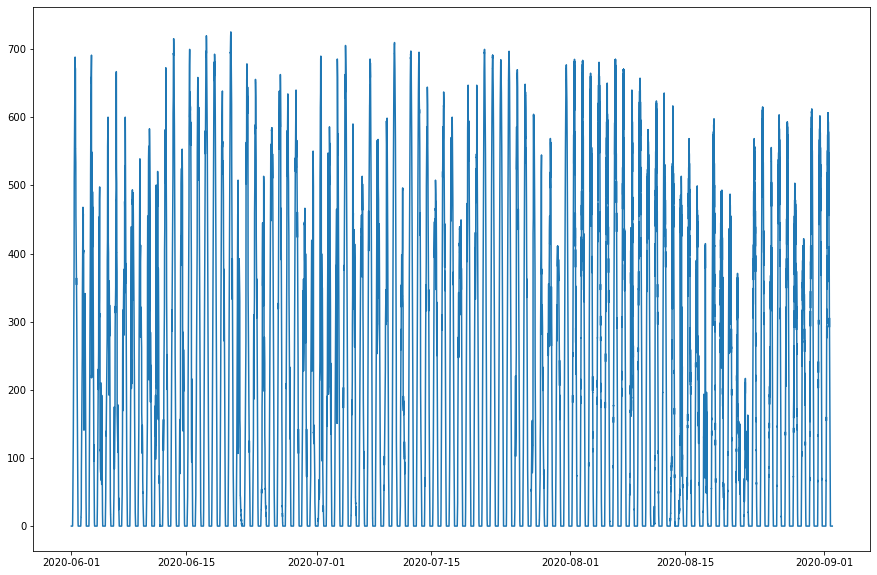

In [8]:
# we select and plot sw rad at surface for first 10 days of august
plt.figure(figsize=(15,10))
plt.plot(summer20_cabauw.time,summer20_cabauw.sfcsw)

In [11]:
#if we just want daily max,min and mean data of 10m windspeed
windspeed = np.sqrt(summer20_cabauw['10u']**2+summer20_cabauw['10v']**2)
dmean=windspeed.resample(time='D').mean()
dmax=windspeed.resample(time='D').max()
dmin=windspeed.resample(time='D').min()

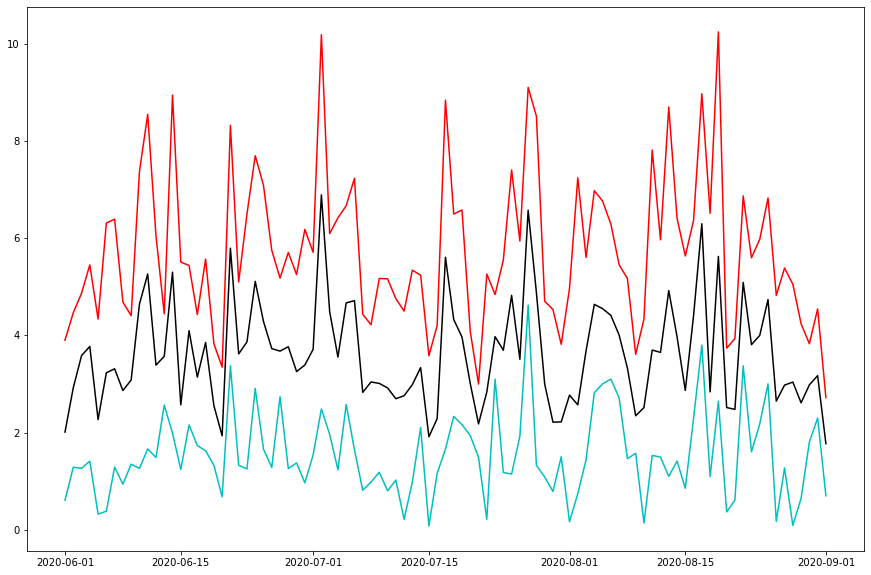

In [12]:
plt.figure(figsize=(15,10))
plt.plot(dmean.time,dmean.values,c='k')
plt.plot(dmin.time,dmin.values,c='c')
plt.plot(dmax.time,dmax.values,c='r')

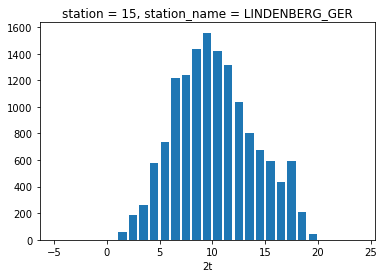

In [13]:
# we will do now a histogram of 2t for the month of April 2020 in Lindenberg
ds2_8=xr.open_zarr('/scratch/b/b381679/ddh_netcdfs/final/2.8km')
n, bins, patches=xr.plot.hist(ds['2t'].sel(time='2020-04',station=15)-273.15,bins=np.arange(-5,25,1),rwidth=0.8)

In [14]:
# we can also plot the mean vertical profiles of cloud cover in Dec2020
cc_Dec2020=ds.cc.sel(time='2020-12', station=15)

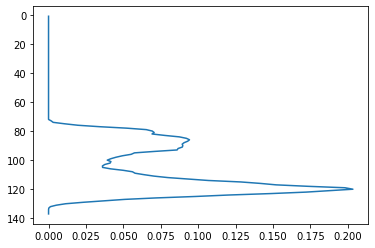

In [15]:
plt.plot(cc_Dec2020.mean(dim='time'),cc_Dec2020.level)
# note that model level=1 is at top of domain, and 137 the closest to surface
plt.gca().invert_yaxis()